In [1]:
import pandas as pd
import numpy as np
import json
import requests
import xmltodict, json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#url1 ="https://www.zillow.com/webservice/GetUpdatedPropertyDetails.htm?zws-id=X1-ZWz17giky9jf9n_43hp8&zpid=48749425"
#url2 ="http://www.zillow.com/webservice/GetDeepComps.htm?zws-id=X1-ZWz17giky9jf9n_43hp8&zpid=48749425&count=5"
#url3 ="http://www.zillow.com/webservice/GetDeepSearchResults.htm?zws-id=X1-ZWz17giky9jf9n_43hp8&address=2114+Bigelow+Ave&citystatezip=Seattle%2C+WA"
url4="http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz17giky9jf9n_43hp8&state=nj&childtype=county"
#url5="http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz17giky9jf9n_43hp8&state=nj&city=jersey&childtype=neighborhood"

In [3]:
#Request API
#response1 = requests.get(url1).content
#response2 = requests.get(url2).content
#response3 = requests.get(url3).content
response4 = requests.get(url4).content

In [4]:
#convert XML to json

#resp1 = xmltodict.parse(response1)
#resp2 = xmltodict.parse(response2)
#resp3 = xmltodict.parse(response3)
resp4 = xmltodict.parse(response4)

#json.dumps(resp1) 
#json.dumps(resp2)
#json.dumps(resp3)
json.dumps(resp4)
#convert json to Dataframe

#propertydetails_df = pd.DataFrame.from_dict(json_normalize(resp1), orient='columns')
#comps_df = pd.DataFrame.from_dict(json_normalize(resp2), orient='columns')
#searchresults_df = pd.DataFrame.from_dict(json_normalize(resp3), orient='columns')
regionchildren_df = pd.DataFrame.from_dict(json_normalize(resp4), orient='columns')


In [5]:
#propertydetails_df.rename(columns=lambda x: x[55:], inplace=True)
#comps_df.rename(columns=lambda x: x[45:], inplace=True)
#searchresults_df.rename(columns=lambda x: x[30:], inplace=True)
regionchildren_df.rename(columns=lambda x: x[30:], inplace=True)


In [6]:
regionchildren_df.head(5)

,@xsi:schemaLocation,@xmlns:xsi,@xmlns:RegionChildren,request.state,request.childtype,message.text,message.code,response.region.id,response.region.latitude,response.region.longitude,response.subregiontype,response.list.count,response.list.region
0,http://www.zillow.com/static/xsd/RegionChildre...,http://www.w3.org/2001/XMLSchema-instance,http://www.zillow.com/static/xsd/RegionChildre...,nj,county,Request successfully processed,0,40,40.14296,-74.727272,county,21,"[{'id': '874', 'name': 'Bergen County', 'zinde..."


In [7]:
#extract child(zipcode) which is a dictionary into a dataframe
region_list = pd.DataFrame(regionchildren_df['response.list.region'][0])
#dropna and reset index
region_list.dropna(how="any", inplace=True)
region_list.reset_index(drop=True, inplace=True)

print(region_list.head(5))

     id              name                                   zindex   latitude  \
0   874     Bergen County  {'@currency': 'USD', '#text': '424000'}  40.948055   
1  2802  Middlesex County  {'@currency': 'USD', '#text': '293300'}  40.430013   
2  1106     Hudson County  {'@currency': 'USD', '#text': '321000'}  40.732859   
3  2441   Monmouth County  {'@currency': 'USD', '#text': '375700'}  40.302335   
4   659      Ocean County  {'@currency': 'USD', '#text': '255700'}  39.823776   

    longitude  
0   -74.08323  
1  -74.416894  
2  -74.075484  
3  -74.249293  
4  -74.259258  


In [8]:
#extract USD value from dictionary
region_list["USD"] = [d.get('#text') for d in region_list.zindex]

region_list

,id,name,zindex,latitude,longitude,USD
0,874,Bergen County,"{'@currency': 'USD', '#text': '424000'}",40.948055,-74.08323,424000
1,2802,Middlesex County,"{'@currency': 'USD', '#text': '293300'}",40.430013,-74.416894,293300
2,1106,Hudson County,"{'@currency': 'USD', '#text': '321000'}",40.732859,-74.075484,321000
3,2441,Monmouth County,"{'@currency': 'USD', '#text': '375700'}",40.302335,-74.249293,375700
4,659,Ocean County,"{'@currency': 'USD', '#text': '255700'}",39.823776,-74.259258,255700
5,771,Union County,"{'@currency': 'USD', '#text': '304100'}",40.665566,-74.300026,304100
6,911,Camden County,"{'@currency': 'USD', '#text': '161500'}",39.802185,-74.938069,161500
7,1964,Passaic County,"{'@currency': 'USD', '#text': '290000'}",41.011428,-74.304838,290000
8,1241,Morris County,"{'@currency': 'USD', '#text': '418700'}",40.867759,-74.578194,418700
9,2896,Burlington County,"{'@currency': 'USD', '#text': '212300'}",39.862536,-74.724851,212300


In [12]:
region_list["USD"] = pd.to_numeric(region_list["USD"])

region_list.dtypes

id           object
name         object
zindex       object
latitude     object
longitude    object
USD           int64
dtype: object

([<matplotlib.axis.XTick at 0x205e2151808>,
 <a list of 20 Text xticklabel objects>)

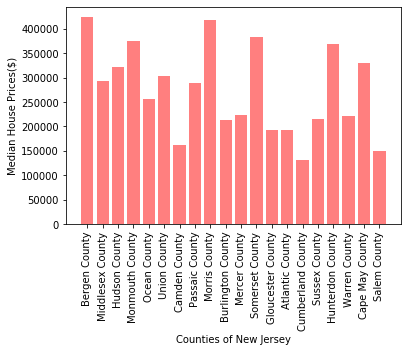

In [25]:
x_axis = np.arange(len(region_list))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, region_list["USD"],color='r', alpha=0.5, align="center")
plt.xlabel("Counties of New Jersey")
plt.ylabel("Median House Prices($)")
plt.xticks(tick_locations, region_list["name"], rotation="vertical")

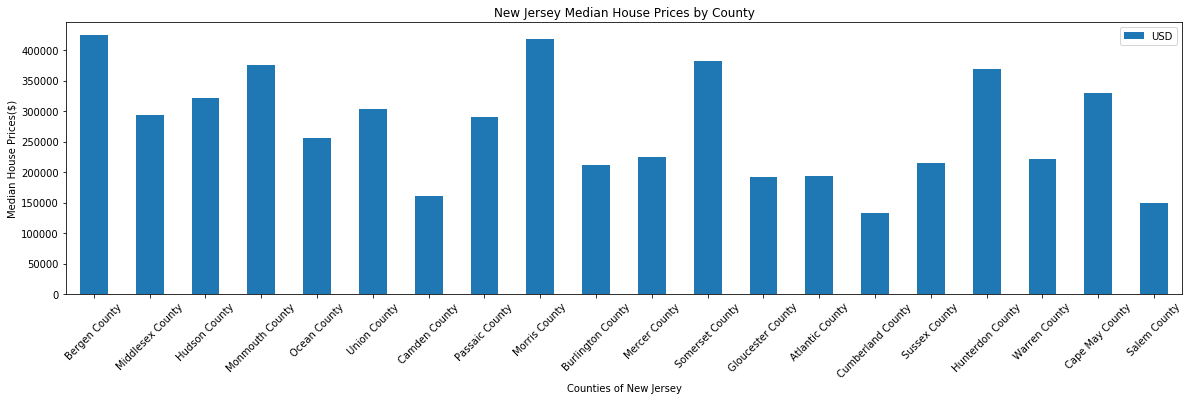

<Figure size 432x288 with 0 Axes>

In [27]:
multi_plot = region_list.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(region_list["name"], rotation=45)
multi_plot.set_xlabel("Counties of New Jersey")
multi_plot.set_ylabel("Median House Prices($)")
multi_plot.set_title("New Jersey Median House Prices by County")
plt.show()
plt.tight_layout()